## Introduction

The data set has been provided by the odin school as an assignment which has following variables and we need to analyse the data set for the sales of the product in different cities of year 2019

## Variables

Order ID: Order identification number for each product

Product: Product name

Quantity Ordered: Amount of items

Price Each: Price of each product per item in dollars

Order Date: Date of purchase

Purchase Address: Address of purchase order

In [1]:
# import Libraries
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#reading data set
df=pd.read_excel("all_data_copy.xlsx")

In [3]:
df.shape  # to find number of instances and features

(373700, 6)

From the above result we can say we have 373700 observation and 6 variables

In [4]:
df.head() # to read first 5 rows of the dataset

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"


In [5]:
df.tail() # to read last 5 rows of the dataset

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
373695,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
373696,259354,iPhone,1,700,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
373697,259355,iPhone,1,700,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
373698,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"
373699,259357,USB-C Charging Cable,1,11.95,2019-09-30 00:18:00,"250 Meadow St, San Francisco, CA 94016"


In [6]:
#replacing the varible names
df=df.rename(columns={'Order ID':'Order_ID','Quantity Ordered':'Qty_Ordered','Price Each':'Price_each','Order Date':'Order_Date','Purchase Address':'Purchase_Address'},inplace=False)

In [7]:
df.nunique() #finding unique number of values of each columnn

Order_ID            178438
Product                 20
Qty_Ordered             10
Price_each              18
Order_Date          142396
Purchase_Address    140788
dtype: int64

## Data Cleaning

In [8]:
df1=df.drop_duplicates() # dropping the duplicate rows from the data set

In [9]:
df1.info() #finding no. of null values and the data types of each column 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185688 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order_ID          185687 non-null  object
 1   Product           185687 non-null  object
 2   Qty_Ordered       185687 non-null  object
 3   Price_each        185687 non-null  object
 4   Order_Date        185687 non-null  object
 5   Purchase_Address  185687 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


From above information we can see that since quantity ordered, Price Each, Order_Date are not of object type but still pandas are reading it as object to we need to change the data type

In [10]:
df1['Order_ID'] =pd.to_numeric(df1['Order_ID'],errors='coerce')
df1['Qty_Ordered'] =pd.to_numeric(df1['Qty_Ordered'],errors='coerce')
df1['Price_each'] =pd.to_numeric(df1['Price_each'],errors='coerce')
df1['Order_Date'] =pd.to_datetime(df1['Order_Date'],errors='coerce')

<ipython-input-10-277a5aba3b87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Order_ID'] =pd.to_numeric(df1['Order_ID'],errors='coerce')
<ipython-input-10-277a5aba3b87>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Qty_Ordered'] =pd.to_numeric(df1['Qty_Ordered'],errors='coerce')
<ipython-input-10-277a5aba3b87>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185688 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_ID          185686 non-null  float64       
 1   Product           185687 non-null  object        
 2   Qty_Ordered       185686 non-null  float64       
 3   Price_each        185686 non-null  float64       
 4   Order_Date        185686 non-null  datetime64[ns]
 5   Purchase_Address  185687 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 9.9+ MB


In [12]:
 #splitting the purchase_Address olumn to get the cities
df1['Address'], df1['city']= df1['Purchase_Address'].str.split(',', 1).str
df1['City'], df1['PIN']= df1['city'].str.split(',', 1).str

<ipython-input-12-67b99484455a>:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df1['Address'], df1['city']= df1['Purchase_Address'].str.split(',', 1).str
<ipython-input-12-67b99484455a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Address'], df1['city']= df1['Purchase_Address'].str.split(',', 1).str
<ipython-input-12-67b99484455a>:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df1['City'], df1['PIN']= df1['city'].str.split(',', 1).str
<ipython-input-12-67b99484455a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [15]:
# drop unnecessary colum to avoid mess

df2=df1.drop(['Purchase_Address','city','Order_ID','PIN','Address'],axis=1)

In [16]:
df2.head() 

,Product,Qty_Ordered,Price_each,Order_Date,City
0,iPhone,1.0,700.00,2019-01-22 21:25:00,Boston
1,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,Portland
2,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,San Francisco
3,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,Los Angeles
4,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,Austin


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185688 entries, 0 to 186849
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Product      185687 non-null  object        
 1   Qty_Ordered  185686 non-null  float64       
 2   Price_each   185686 non-null  float64       
 3   Order_Date   185686 non-null  datetime64[ns]
 4   City         185686 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 8.5+ MB


In [18]:
# splitting date and time from the Order_Date as bot are given in the same column
df2['Date'] = (df2['Order_Date']).dt.date
df2['Time'] = (df2['Order_Date']).dt.time

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185688 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Product      185687 non-null  object        
 1   Qty_Ordered  185686 non-null  float64       
 2   Price_each   185686 non-null  float64       
 3   Order_Date   185686 non-null  datetime64[ns]
 4   City         185686 non-null  object        
 5   Date         185686 non-null  object        
 6   Time         185686 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 11.3+ MB


In [20]:
df2['Date'] =pd.to_datetime(df2['Date'],errors='coerce')
df2['Time'] = df2['Order_Date'].dt.time
df2['Hour'] = df2['Order_Date'].dt.hour
df2['Year'] = df2['Date'].dt.year
df2['Month'] = df2['Date'].dt.month

In [21]:

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185688 entries, 0 to 186849
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Product      185687 non-null  object        
 1   Qty_Ordered  185686 non-null  float64       
 2   Price_each   185686 non-null  float64       
 3   Order_Date   185686 non-null  datetime64[ns]
 4   City         185686 non-null  object        
 5   Date         185686 non-null  datetime64[ns]
 6   Time         185686 non-null  object        
 7   Hour         185686 non-null  float64       
 8   Year         185686 non-null  float64       
 9   Month        185686 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(3)
memory usage: 15.6+ MB


In [22]:
# drop the rows eith NAN values
df3=df2.dropna()

In [23]:
df3.head()

,Product,Qty_Ordered,Price_each,Order_Date,City,Date,Time,Hour,Year,Month
0,iPhone,1.0,700.00,2019-01-22 21:25:00,Boston,2019-01-22,21:25:00,21.0,2019.0,1.0
1,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,Portland,2019-01-28,14:15:00,14.0,2019.0,1.0
2,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,San Francisco,2019-01-17,13:33:00,13.0,2019.0,1.0
3,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,Los Angeles,2019-01-05,20:33:00,20.0,2019.0,1.0
4,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,Austin,2019-01-25,11:59:00,11.0,2019.0,1.0


In [28]:
# change the data typ eof the Year Month and Hour 
df3['Month']=df3['Month'].astype(int)
df3['Year']=df3['Year'].astype(int)
df3['Hour']=df3['Hour'].astype(int)
# calculating the sales 
df3['Sales']=df3['Qty_Ordered']*df3['Price_each']

<ipython-input-28-797525b32fff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Month']=df3['Month'].astype(int)
<ipython-input-28-797525b32fff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Year']=df3['Year'].astype(int)
<ipython-input-28-797525b32fff>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

In [29]:
df3

,Product,Qty_Ordered,Price_each,Order_Date,City,Date,Time,Hour,Year,Month,Sales
0,iPhone,1.0,700.00,2019-01-22 21:25:00,Boston,2019-01-22,21:25:00,21,2019,1,700.00
1,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,Portland,2019-01-28,14:15:00,14,2019,1,14.95
2,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,San Francisco,2019-01-17,13:33:00,13,2019,1,23.98
3,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,Los Angeles,2019-01-05,20:33:00,20,2019,1,149.99
4,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,Austin,2019-01-25,11:59:00,11,2019,1,11.99
...,...,...,...,...,...,...,...,...,...,...,...
186845,Lightning Charging Cable,1.0,14.95,2019-12-11 20:58:00,San Francisco,2019-12-11,20:58:00,20,2019,12,14.95
186846,AA Batteries (4-pack),2.0,3.84,2019-12-01 12:01:00,Los Angeles,2019-12-01,12:01:00,12,2019,12,7.68
186847,Vareebadd Phone,1.0,400.00,2019-12-09 06:43:00,Seattle,2019-12-09,06:43:00,6,2019,12,400.00
186848,Wired Headphones,1.0,11.99,2019-12-03 10:39:00,Dallas,2019-12-03,10:39:00,10,2019,12,11.99


After preprocessing the data set we have 185686 observation and 11 varibales which are diffrent from the initial dataset 

New Calculated variables are:

Sales:It is the prodct of the qty_ordered and Price_each

City: Extracted from the the Purchase address by splitting

Date: Extreacted from the order_date to get the date

Time: Time at which product get sold

Year: Product selling Year

Month: on Which month product are getting sold


## Highest sales Month

In [41]:
res=df3.groupby('Month').sum()
res


,Order_ID,Qty_Ordered,Price_each,Year,Hour,Sales
Month,,,,,,
1,1.420152e+09,10893.0,1.810925e+06,19582315,139339,1.821413e+06
2,1.868279e+09,13431.0,2.186940e+06,24141183,172392,2.200078e+06
3,2.560592e+09,16979.0,2.789085e+06,30543432,218622,2.804973e+06
4,3.383299e+09,20536.0,3.366219e+06,36860883,261916,3.389218e+06
5,3.343057e+09,18653.0,3.133135e+06,33418488,238580,3.150616e+06
6,2.928868e+09,15234.0,2.560504e+06,27327165,195223,2.576280e+06
7,3.280011e+09,16054.0,2.631225e+06,28821225,205909,2.646461e+06
8,2.894980e+09,13429.0,2.226964e+06,24112917,172049,2.241083e+06
9,2.944144e+09,13091.0,2.081898e+06,23426457,168206,2.094466e+06


from the above table we can see that the month of december is the highest selling month but to analyse more we have pictorial representation of the same below

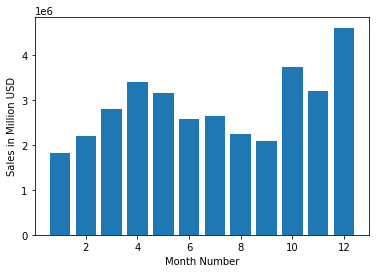

In [42]:
Months=range(1,13)
res=df3.groupby('Month').sum()
plt.bar(Months,res['Sales'])
plt.ylabel("Sales in Million USD")
plt.xlabel("Month Number")
plt.show()


From Here we can say that month of December is marked as the highest sales month

## City With Highest Sales

In [43]:
res2=df3.groupby('City').sum()
res2

,Order_ID,Qty_Ordered,Price_each,Year,Month,Hour,Sales
City,,,,,,,
Atlanta,3.419485e+09,16584.0,2.778609e+06,30008397,104649,214003,2.794199e+06
Austin,2.277506e+09,11137.0,1.808340e+06,19967912,69720,141688,1.818044e+06
Boston,4.590961e+09,22494.0,3.634398e+06,40180123,140898,287705,3.658628e+06
Dallas,3.410206e+09,16707.0,2.750026e+06,29875145,104447,214078,2.765374e+06
Los Angeles,6.801454e+09,33247.0,5.417172e+06,59689717,208020,426924,5.448304e+06
New York City,5.729940e+09,27903.0,4.632921e+06,50166103,175557,357214,4.661867e+06
Portland,2.864927e+09,14037.0,2.306589e+06,25134533,87636,179394,2.319332e+06
San Francisco,1.028721e+10,50169.0,8.204001e+06,90172590,314949,642269,8.254744e+06
Seattle,3.402481e+09,16534.0,2.730587e+06,29705548,104817,213005,2.745046e+06


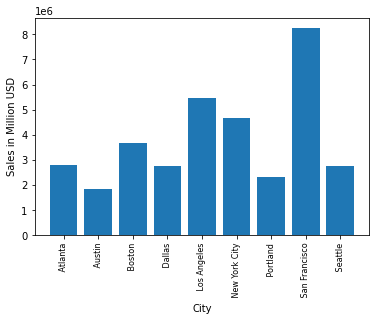

In [44]:
cities=[city for city,df in df3.groupby('City')]

plt.bar(cities,res2['Sales'])
plt.xticks(cities,rotation='vertical',size=8)
plt.ylabel("Sales in Million USD")
plt.xlabel("City")
plt.show()


From above Graph we can analyze that city with highest Sale is marked as San Francisco

## Highest selling Product per City

<ipython-input-52-69cf74df2f47>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


[Text(0.0, 0, ''),
 Text(1000.0, 0, ''),
 Text(2000.0, 0, ''),
 Text(3000.0, 0, ''),
 Text(4000.0, 0, ''),
 Text(5000.0, 0, ''),
 Text(6000.0, 0, '')]

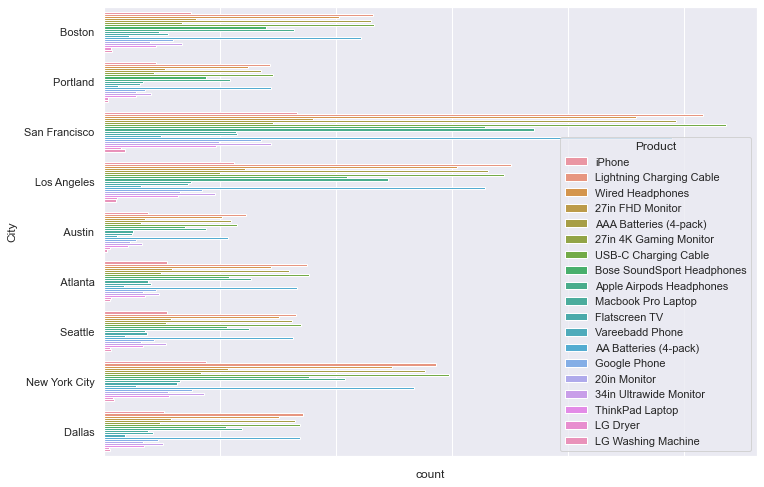

In [52]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.set_theme(style="darkgrid")
ax=sns.countplot(y ='City', hue = "Product", data = df3,linewidth=1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

Highest Selling Product Per city

|City| Product|
|---|---|
|Boston|USB C Charging Cable|
|Portland|USB C charging Cable|
|San Francisco|USB C charging cable|
|Los Angeles|Lightening Charging Cable|
|Austin|Lightening Charging Cable|
|Atlanta|USB C charging Cable|
|Seattle|USB C Charging Cable|
|New York City|USB C Charging Cable|
|Dallas|Lightening Charging Cable|

In [54]:
# binning the hour and categorizing in four category
df3['HOURS']=pd.cut(df3.Hour,bins=[0,6,12,18,24],labels=['Morning','Afternoon','Evening','Night'])


<ipython-input-54-fd0a74bf0388>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['HOURS']=pd.cut(df3.Hour,bins=[0,6,12,18,24],labels=['Morning','Afternoon','Evening','Night'])


In [55]:
df3.head()

,Order_ID,Product,Qty_Ordered,Price_each,Order_Date,Address,City,PIN,Date,Time,Year,Month,Hour,Sales,HOURS
0,141234.0,iPhone,1.0,700.00,2019-01-22 21:25:00,944 Walnut St,Boston,MA 02215,2019-01-22,21:25:00,2019,1970-01-01 00:00:00.000000001,21,700.00,Night
1,141235.0,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,185 Maple St,Portland,OR 97035,2019-01-28,14:15:00,2019,1970-01-01 00:00:00.000000001,14,14.95,Evening
2,141236.0,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,538 Adams St,San Francisco,CA 94016,2019-01-17,13:33:00,2019,1970-01-01 00:00:00.000000001,13,23.98,Evening
3,141237.0,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,738 10th St,Los Angeles,CA 90001,2019-01-05,20:33:00,2019,1970-01-01 00:00:00.000000001,20,149.99,Night
4,141238.0,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,387 10th St,Austin,TX 73301,2019-01-25,11:59:00,2019,1970-01-01 00:00:00.000000001,11,11.99,Afternoon


[Text(0, 0, 'iPhone'),
 Text(1, 0, 'Lightning Charging Cable'),
 Text(2, 0, 'Wired Headphones'),
 Text(3, 0, '27in FHD Monitor'),
 Text(4, 0, 'AAA Batteries (4-pack)'),
 Text(5, 0, '27in 4K Gaming Monitor'),
 Text(6, 0, 'USB-C Charging Cable'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Apple Airpods Headphones'),
 Text(9, 0, 'Macbook Pro Laptop'),
 Text(10, 0, 'Flatscreen TV'),
 Text(11, 0, 'Vareebadd Phone'),
 Text(12, 0, 'AA Batteries (4-pack)'),
 Text(13, 0, 'Google Phone'),
 Text(14, 0, '20in Monitor'),
 Text(15, 0, '34in Ultrawide Monitor'),
 Text(16, 0, 'ThinkPad Laptop'),
 Text(17, 0, 'LG Dryer'),
 Text(18, 0, 'LG Washing Machine')]

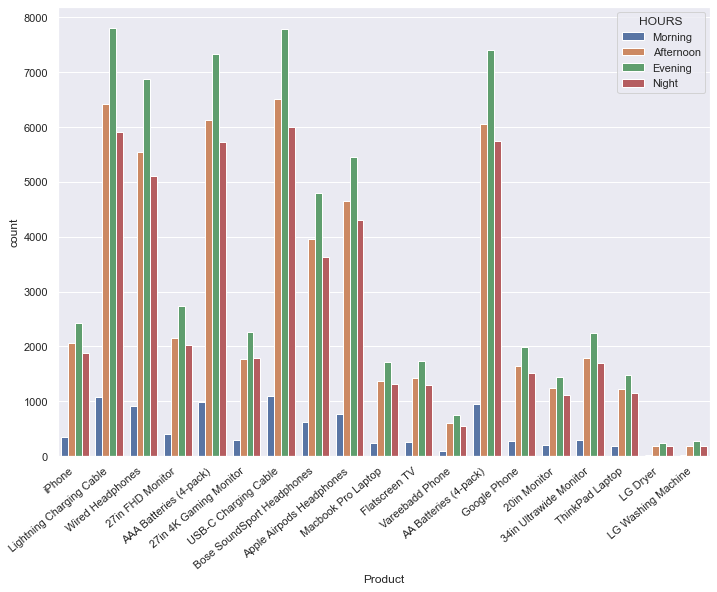

In [59]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax=sns.countplot(x ='Product', hue = "HOURS", data = df3)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

from the above graph we can clearly see that the evening time sales are at peak of every product

1.) Product that are mostly sold at diffrent times of the day is Lightening Charging Cable

2.) most active sales time is the Evening Time

In [60]:
df4=df3[df3['Order_ID'].duplicated(keep=False)]
df4['Product_combine']=df4.groupby('Order_ID')['Product'].transform(lambda x: ','.join(x))
df4=df4[['Order_ID','Product_combine']].drop_duplicates()
df4.head()

<ipython-input-60-575ced1c6ab9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Product_combine']=df4.groupby('Order_ID')['Product'].transform(lambda x: ','.join(x))


,Order_ID,Product_combine
41,141275.0,"USB-C Charging Cable,Wired Headphones"
57,141290.0,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365.0,"Vareebadd Phone,Wired Headphones"
153,141384.0,"Google Phone,USB-C Charging Cable"
220,141450.0,"Google Phone,Bose SoundSport Headphones"


In [61]:
from itertools import combinations
from collections import Counter
count=Counter()
for row in df4['Product_combine']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))
count.most_common()

[(('iPhone', 'Lightning Charging Cable'), 1002),
 (('Google Phone', 'USB-C Charging Cable'), 985),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 413),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 159),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92),
 (('Lightning Charging Cable', 'Apple Airpods Headphones'), 81),
 (('Vareebadd Phone', 'Bose SoundSport Headphones'), 80),
 (('USB-C Charging Cable', 'Bose SoundSport Headphones'), 77),
 (('Apple Airpods Headphones', 'Wired Headphones'), 69),
 (('Lightning Charging Cable', 'USB-C Charging Cable'), 58),
 (('Lightning Charging Cable', 'AA Batteries (4-pack)'), 55),
 (('Bose SoundSport Headphones', 'Wired Headphones'), 53),
 (('AA Batteries (4-pack)', 'Lightning Charging Cable'), 51),
 (('AAA Bat

From the above analysis we acan see that the most sold product pair is( Iphone with Lightening Charging Cable )


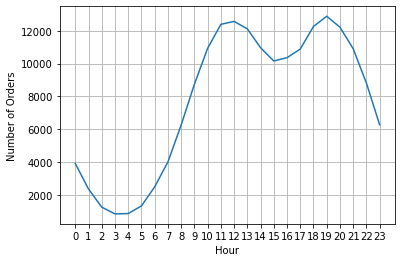

In [32]:
res4=df3.groupby(['Hour'])['Qty_Ordered'].count()
hours=[Hour for Hour,df in df3.groupby('Hour') ]
plt.plot(hours,res4)
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

There are approximately 2 peaks at the data. They are 12 (12 PM) and 19 (7 PM). It makes sense since most people shopping during the day. From this data, we can suggest to our bussiness partner to advertise their product right before 12 PM and/or 7 PM. It could be 11.30 AM and/or 6.30 PM.

## Conclusion

San Francisco is the city with Highest sales

In the Month of December sales are at peak 

Reason could be the Christmas and New Year, since On the occasion of Christmas peaople distibute gift to one another that can be probability of rising sale.

We can  establish more store in san Francisco as the purchasing power is higher, by observing the sales with different cities
sales of the product increases during the evening hour in comparison to other time of the day, so one can advertise during these time to increase the sales more and can give some exciting offer on the highest selling product.

We have also observed that in pair products like iphone with lightening charging cable are sold more beacuse without chrging cable one cannot charge their phone so those who buy iphone most of them also buy lightening charging cable
